In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')


In [3]:
confirmed = confirmed.groupby('Country/Region').sum(numeric_only=True).drop(columns=['Lat', 'Long'])
deaths = deaths.groupby('Country/Region').sum(numeric_only=True).drop(columns=['Lat', 'Long'])
recovered = recovered.groupby('Country/Region').sum(numeric_only=True).drop(columns=['Lat', 'Long'])


In [4]:
confirmed_T = confirmed.T
deaths_T = deaths.T
recovered_T = recovered.T

confirmed_T.index = pd.to_datetime(confirmed_T.index)
deaths_T.index = pd.to_datetime(deaths_T.index)
recovered_T.index = pd.to_datetime(recovered_T.index)


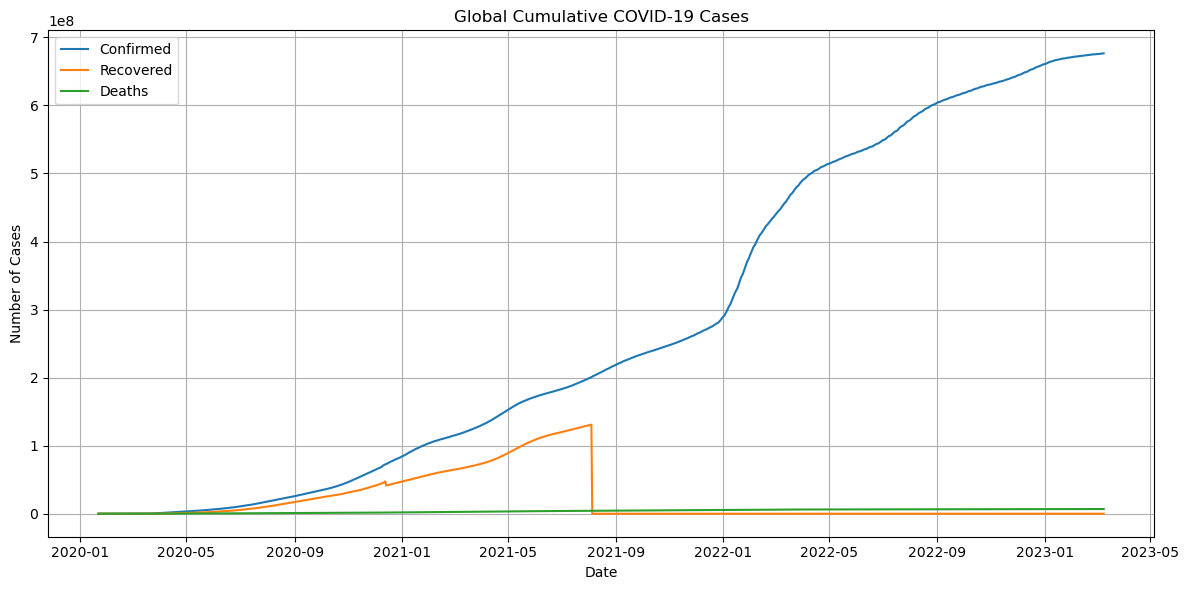

In [5]:
total_confirmed = confirmed_T.sum(axis=1)
total_deaths = deaths_T.sum(axis=1)
total_recovered = recovered_T.sum(axis=1)

plt.figure(figsize=(12,6))
plt.plot(total_confirmed, label='Confirmed')
plt.plot(total_recovered, label='Recovered')
plt.plot(total_deaths, label='Deaths')
plt.title('Global Cumulative COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


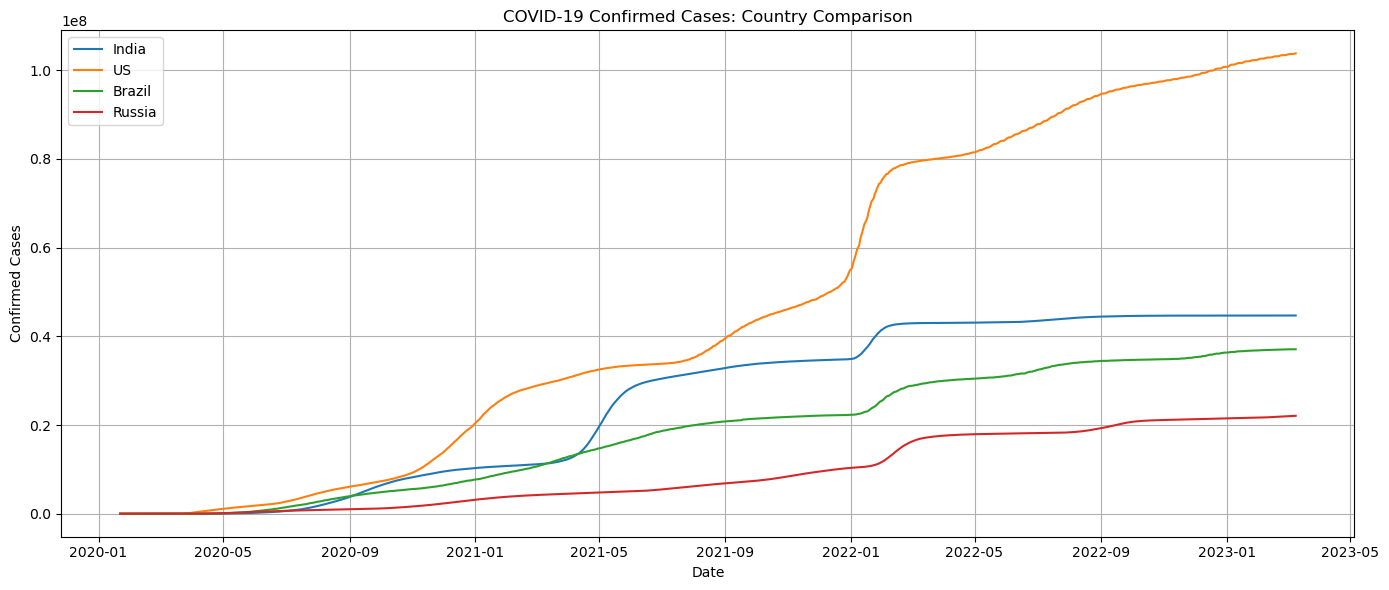

In [6]:
countries = ['India', 'US', 'Brazil', 'Russia']
plt.figure(figsize=(14,6))
for country in countries:
    plt.plot(confirmed_T[country], label=country)
plt.title('COVID-19 Confirmed Cases: Country Comparison')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


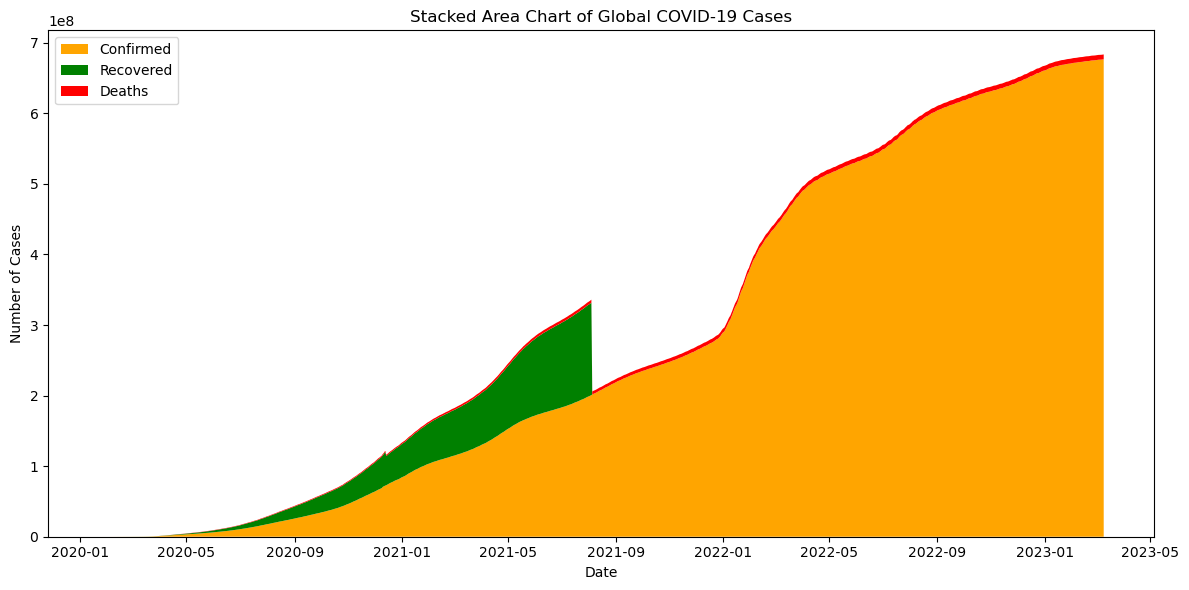

In [7]:
plt.figure(figsize=(12,6))
plt.stackplot(confirmed_T.index, 
              total_confirmed, total_recovered, total_deaths, 
              labels=['Confirmed', 'Recovered', 'Deaths'],
              colors=['orange', 'green', 'red'])
plt.legend(loc='upper left')
plt.title('Stacked Area Chart of Global COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()


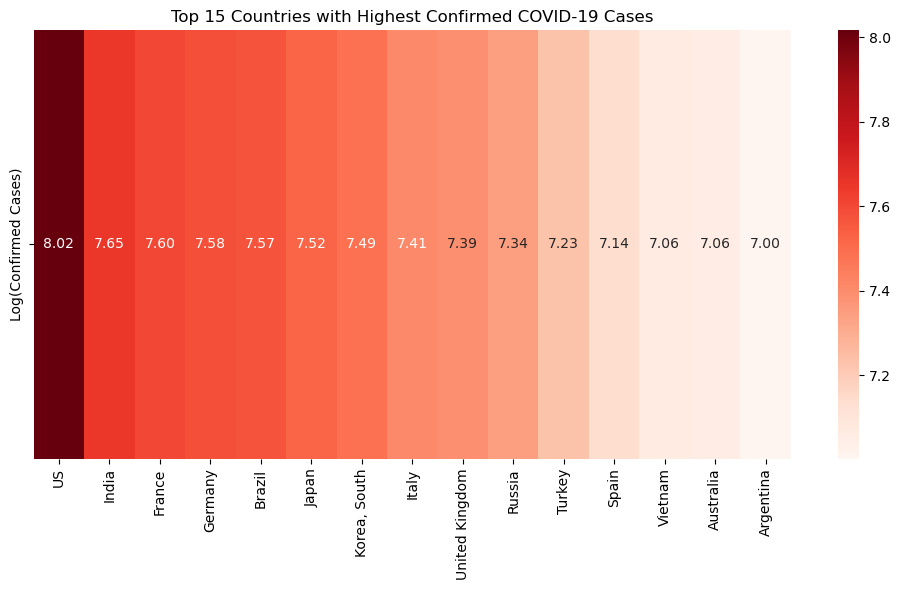

In [8]:
latest = confirmed.iloc[:, -1]  # Last column
top_15 = latest.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.heatmap(np.log10(top_15.values).reshape(1, -1), 
            annot=True, fmt=".2f", 
            yticklabels=['Log(Confirmed Cases)'], 
            xticklabels=top_15.index, cmap='Reds')
plt.title('Top 15 Countries with Highest Confirmed COVID-19 Cases')
plt.tight_layout()
plt.show()
